In [3]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [4]:
def load_data(trace_path):
    with open(trace_path) as json_file:
        json_data = json.load(json_file)

        return json_data

        events = json_data['traceEvents']

        cuda_events = []
        wall_times = []
        timestamps = []

        for event in events:
            if 'stream' in str(event['tid']) and \
                    'name' in event.keys() and \
                    'dur' in event.keys() and \
                    event['cat'] == 'Kernel':
                cuda_events.append(event)
                # print(f"{event['ts']}: {event['dur']}")

                wall_times.append(event['dur'])
                timestamps.append(event['ts'])

        kernel_names = []
        kernel_sum_dur = {}
        kernel_count = {}
        for event in cuda_events:
            kernel_names.append(event['name'])
            kernel_sum_dur[event['name']] = 0
            kernel_count[event['name']] = 0

        kernel_names = np.unique(kernel_names)

        for i in range(len(kernel_names)):
            name = kernel_names[i]
            # print(f'{i}: {kernel_names[i]}')

        for event in cuda_events:
            kernel_sum_dur[event['name']] += event["dur"]
            kernel_count[event['name']] += 1

        for event in cuda_events:
            kernel_sum_dur[event['name']] /= kernel_count[event['name']]


        return {
            "wall_times": wall_times,
            "timestamps": timestamps,
            "kernel_names": kernel_names,
            "kernel_count": kernel_count,
            "kernel_info": kernel_sum_dur
        }

In [21]:
def draw_fixed_model(info):
    profiled_infos = []
    model = info["model"]

    for gpu in info["gpus"]:
        profiled_infos.append({
            "data": load_data(f"{gpu}-{model}-batch-test.json"),
            "gpu": gpu,
        })

    datas = []

    for info in profiled_infos:
        datas.append(info)

    plt.title(f"{model}")
    ax = plt.subplot(111)
    ax.set_xlabel("batch size")
    ax.set_ylabel("iteration time (ms)")
    for data in datas:
        ax.plot(data["data"]["elapsed_time"]["batch_sizes"],
                data["data"]["elapsed_time"]["iteration_sum"],
                #data["data"]["elapsed_time"]["forward"],
                '-',
                #color='steelblue',
                label=data["gpu"])

    ax.legend()
    plt.savefig(f"{model}-batch-sizes-analysis.png", dpi=400)

/Users/yoonsung/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


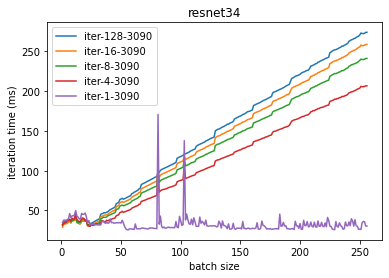

In [22]:
info = {
    "gpus": ["iter-128-3090", "iter-16-3090", "iter-8-3090", "iter-4-3090", "iter-1-3090"],
    "model": "resnet34",
}

draw_fixed_model(info)

In [31]:
def draw_iters(info):
    gpu = info["gpu"]
    model = info["model"]

    profiled_info = {
        "data": load_data(f"{gpu}-{model}-batch-test.json"),
        "gpu": gpu,
    }

    iters = profiled_info["data"]["elapsed_time"]["iterations"]
    batch_sizes = profiled_info["data"]["elapsed_time"]["batch_sizes"]
    ett = profiled_info["data"]["elapsed_time"]["ett_per_iter"]
    batch_range = 16

    plt.title(f"{model}")
    ax = plt.subplot(111)
    ax.set_xlabel("iteration index")
    ax.set_ylabel("iteration time (ms)")
    for b in range(batch_range):
        ax.plot([i for i in range(iters)],
                ett[b + 100],
                #data["data"]["elapsed_time"]["forward"],
                '-',
                #color='steelblue',
                label=f"batch size: {b}")

    ax.legend()
    plt.savefig(f"{model}-batch-sizes-analysis.png", dpi=400)

/Users/yoonsung/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


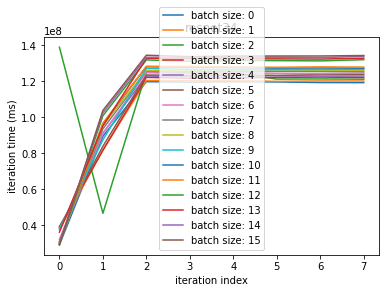

In [32]:
info = {
    "gpu": "iter-8-3090",
    "model": "resnet34",
}

draw_iters(info)

/Users/yoonsung/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


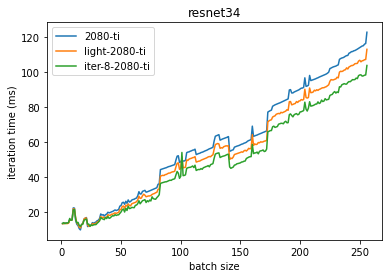

In [16]:
info = {
    "gpus": ["2080-ti", "light-2080-ti", "iter-8-2080-ti"],
    "model": "resnet34",
}

draw_fixed_model(info)

In [34]:
def draw_fixed_gpu(info):
    profiled_infos = []
    gpu = info["gpu"]

    for model in info["models"]:
        profiled_infos.append({
            "data": load_data(f"{gpu}-{model}-batch-test.json"),
            "model": model,
        })

    data0 = profiled_infos[0]
    data1 = profiled_infos[1]


    plt.title(f"{gpu}")
    ax = plt.subplot(111)
    ax.set_xlabel("batch size")
    ax.set_ylabel("iteration time (ms)")
    ax.plot(data0["data"]["elapsed_time"]["batch_sizes"],
            data0["data"]["elapsed_time"]["iteration_sum"],
            '-',
            color='steelblue',
            label=data0["model"])

    ax.plot(data1["data"]["elapsed_time"]["batch_sizes"],
            data1["data"]["elapsed_time"]["iteration_sum"],
            '-',
            color='darkorange',
            label=data1["model"])
    ax.legend()
    plt.savefig(f"{gpu}-batch-sizes-analysis.png", dpi=400)

/Users/yoonsung/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


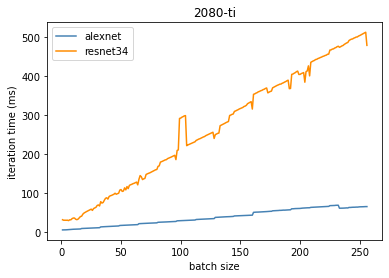

In [35]:
info = {
    "gpu": "2080-ti",
    "models": ["alexnet", "resnet34"],
}

draw_fixed_gpu(info)

/Users/yoonsung/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


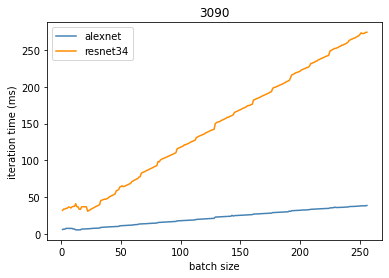

In [36]:
info = {
    "gpu": "3090",
    "models": ["alexnet", "resnet34"],
}

draw_fixed_gpu(info)